# Project: Soccer Data Investigation- Player Analysis

## Introduction

### Dataset Description

From Kaggle, database for soccer dataset from 2008 to 2016 was obtained. This database provides data collected from various European countries on soccer.

The players' dataset (Player.csv) is more of players individual profile that includes the profile of the player namely:
    players, id                  
    player_api_id         
    player_name           
    player_fifa_api_id    
    birthday              
    height                
    weight          

While the players'attribute dataset (Player_Attribute.csv) comprises the following:
    id                     
    player_fifa_api_id     
    player_api_id          
    overall_rating         
    potential              
    heading_accuracy       
    sprint_speed           
    stamina               
    strength 
    etc
    
The relationship between these two tables is that the height and weight of a player may be connected to some attributes as documented in the players' attributes. For instance, the heading accuracy for a taller person may likely head a ball into or prevent it from entring into the goal post. Also, height may be implicated in assessing a player's potential towards his role as a defender, goalkeeper or midfielder. In addition, the BMI estimated from the height and weight of a player influence the sprint speed, stamina. Both height and weight may contribute to the overall rating of a player. In order to make this claims worthy, it is necessary to use data to tell this story.

Dependent variable(s): overall_rating , potential, heading_accuracy, sprint_speed, stamina, strength
Independent variable(s): Height and weight

**Aim**

The purpose of this investigation is to understand how the height and weight of Players, having two different 
identification numbers (player_api_id and FiFa_id), affect on their attributes qualities, which may consequently impact the performance of the team they represent.


### Question(s) for Analysis
1. What is the relationship between the height and some players' attributes such as overall_rating, potential, heading_accuracy and sprint_speed?
2. What is the relationship between weight and some players' attributes such as overall_rating, potential, heading_accuracy and sprint_speed?


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.2MB/s eta 0:00:01 1% |▋                               | 184kB 8.1MB/s eta 0:00:02    8% |██▊                             | 890kB 9.9MB/s eta 0:00:01    24% |████████                        | 2.6MB 29.2MB/s eta 0:00:01    74% |███████████████████████▉        | 7.8MB 27.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01  6% |██                              | 870kB 25.5MB/s eta 0:00:01    35% |███████████▍                    | 4.8MB 27.2MB/s eta 0:00:01    55% |█████████████████▊              | 7.4MB 26.0MB/s eta 0:00:01    84% |███████████████████████████     | 11.3MB 25.2MB/s eta 0:00:01    91% |█████████████████████████████▎  | 12.3MB 27.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 

In [2]:
# import all the packages required.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data wrangling
Here, we load the data then check trim and clean the dataset in preparation for analysis.


**Exploring the first dataset**

In [3]:
# read the first dataframe.
df =pd.read_csv('Player.csv')

In [4]:
# To view the first 5 rows of the dataframe. 
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [5]:
df.info() # To identify the datatype of the columns, clums with incomplete entries, number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [6]:
#To convert the height from float datatype into interger
df['height']= df['height']. astype(int)

In [7]:
# To confirm that the height data is an integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null int64
weight                11060 non-null int64
dtypes: int64(5), object(2)
memory usage: 605.0+ KB


In [8]:
df.duplicated().sum() # To find duplicated row(s) in the dataframe

0

In [9]:
df.isnull().sum() # To find missing values in the dataframe

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

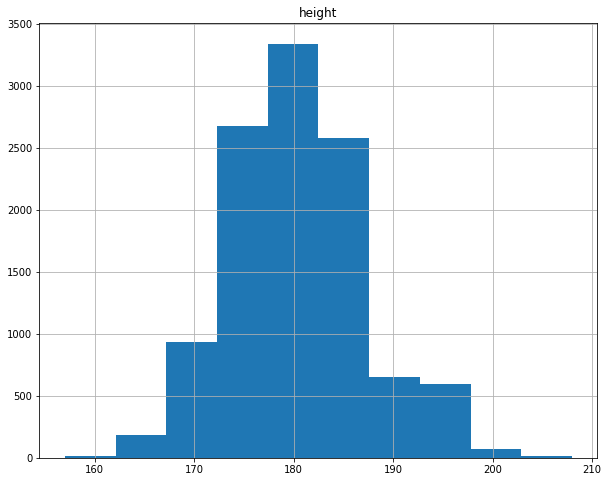

In [10]:
 #To check for the data disribution
df.hist('height', figsize=(10,8))
plt.show()

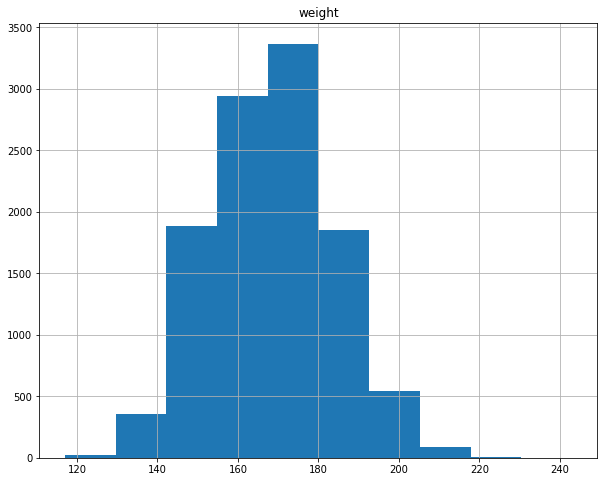

In [11]:
df.hist('weight', figsize=(10,8))  #To check for the data disribution
plt.show()

In [12]:
df.describe() #to view the summary of the descriptive statistics of players

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.283544,168.380289
std,3197.692647,160713.700624,58649.928360,6.341794,14.990217
min,1.000000,2625.000000,2.000000,157.000000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.000000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.000000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.000000,179.000000
max,11075.000000,750584.000000,234141.000000,208.000000,243.000000


In [13]:
df.shape # To find the dimension of the dataframe

(11060, 7)

In [14]:
df.nunique()  # To count the number of distinct elements in specified axis

id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64

In [15]:
#To list the column names
df.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [16]:
#To drop column -birthday
df.drop(['birthday'], axis=1, inplace=True) # birthday column was dropped as it is not required for further analysis

In [17]:
#To confirm the column drop
df.head()

,id,player_api_id,player_name,player_fifa_api_id,height,weight
0,1,505942,Aaron Appindangoye,218353,182,187
1,2,155782,Aaron Cresswell,189615,170,146
2,3,162549,Aaron Doran,186170,170,163
3,4,30572,Aaron Galindo,140161,182,198
4,5,23780,Aaron Hughes,17725,182,154


**Summary of players.csv**
1. Player.csv dataset has no missing value 
2. The dataframe has no duplicated row
3. Both height and weight data distributions are skewed to the left


**Exploring the second dataset**

In [18]:
# read the second dataframe.
df1=pd.read_csv('Player_Attributes.csv')

In [19]:
# view the first 5 rows of the second dataframe
df1.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
df1.info() #helps to identify null values in columns and provide information about datatype, coluumn list e.t.c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [21]:
df1.duplicated().sum() # To find duplicated row(s) in the dataframe

0

In [22]:
df1.isnull().sum()  #This presents the number of empty cells in the dataframe of each column

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [23]:
df1.describe() #to view the summary of the descriptive statistics of players

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [24]:
df1.shape

(183978, 42)

In [25]:
df1.nunique().sum()

209464

In [26]:
df.columns # To see clearly the column titles remaining

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'height',
       'weight'],
      dtype='object')

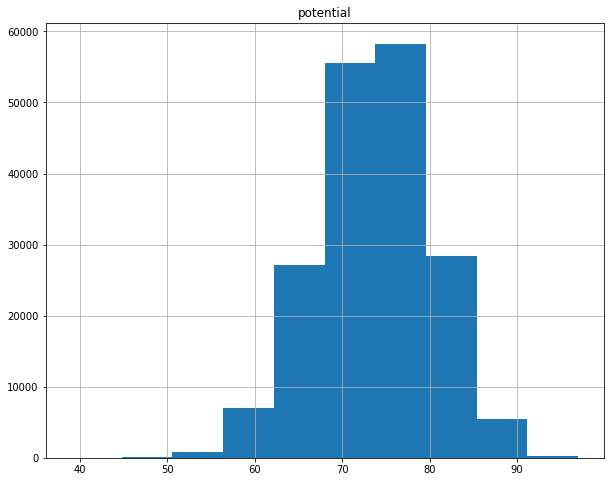

In [27]:
df1.hist('potential', figsize=(10,8)) # To check for the data disribution
plt.show()

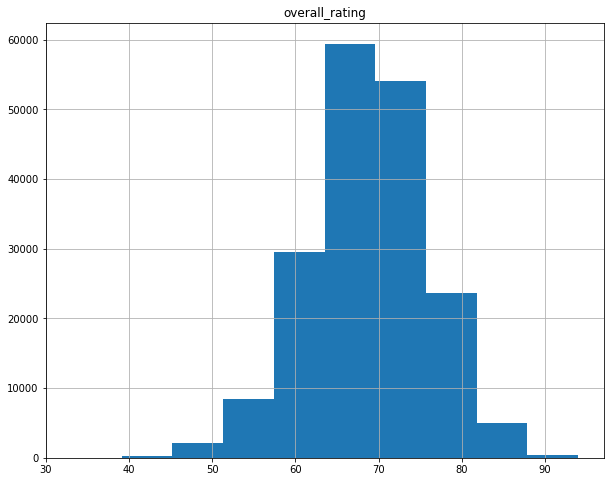

In [28]:
df1.hist( 'overall_rating', figsize=(10,8)) #To check for the data disribution
plt.show()

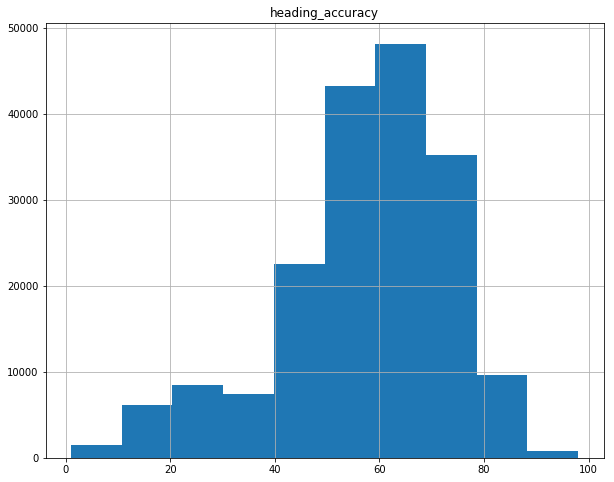

In [29]:
df1.hist('heading_accuracy', figsize=(10,8)) #To check for the data disribution
plt.show()

**Summary of players_attributes.csv**
1. Player_attributes.csv dataset has numerous missing values. 
2. There is no duplicate, but the names and the id may be repeated.
3. The repeated names and id is due to the various years the assessment was taken nor duplicated row.
4. Data distribtions were mostly skewed to the left.

## Data wrangling

Here, the data were checked, trimmed and cleaned for analysis.



In [30]:
# To extract/select the needed columns from players' attributes dataframe for further analysis

df1_subset=df1.loc[:, ['player_fifa_api_id', 'player_api_id','overall_rating', 'potential', 'heading_accuracy', 'sprint_speed', 'stamina','strength']]

In [31]:
#To view the first 5 rows extracted columns
df1_subset.head()

,player_fifa_api_id,player_api_id,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
0,218353,505942,67.0,71.0,71.0,64.0,54.0,76.0
1,218353,505942,67.0,71.0,71.0,64.0,54.0,76.0
2,218353,505942,62.0,66.0,71.0,64.0,54.0,76.0
3,218353,505942,61.0,65.0,70.0,64.0,54.0,76.0
4,218353,505942,61.0,65.0,70.0,64.0,54.0,76.0


In [32]:
#To view the information contained in the selected columns
df1_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 8 columns):
player_fifa_api_id    183978 non-null int64
player_api_id         183978 non-null int64
overall_rating        183142 non-null float64
potential             183142 non-null float64
heading_accuracy      183142 non-null float64
sprint_speed          183142 non-null float64
stamina               183142 non-null float64
strength              183142 non-null float64
dtypes: float64(6), int64(2)
memory usage: 11.2 MB


In [33]:
df1_subset.loc[df1_subset.duplicated(),:].head()

,player_fifa_api_id,player_api_id,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
1,218353,505942,67.0,71.0,71.0,64.0,54.0,76.0
4,218353,505942,61.0,65.0,70.0,64.0,54.0,76.0
6,189615,155782,74.0,76.0,58.0,78.0,79.0,56.0
8,189615,155782,73.0,75.0,57.0,78.0,79.0,56.0
9,189615,155782,73.0,75.0,57.0,78.0,79.0,56.0


In [34]:
#To check for the sum of duplicates in the extracted columns
df1_subset.duplicated().sum()

69121

In [35]:
#Here, the two dataframes together were merged.
#Let PPA represent the merged dataframes of players (df) and selected players' attributes (df1_subset).

PPA =pd.merge(left=df, right= df1_subset, how='outer', left_on=df['player_api_id'], right_on=df1_subset['player_api_id'])

In [36]:
#To view the 5 first rows of the merged dataframes
PPA.head()

,key_0,id,player_api_id_x,player_name,player_fifa_api_id_x,height,weight,player_fifa_api_id_y,player_api_id_y,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
0,505942,1,505942,Aaron Appindangoye,218353,182,187,218353,505942,67.0,71.0,71.0,64.0,54.0,76.0
1,505942,1,505942,Aaron Appindangoye,218353,182,187,218353,505942,67.0,71.0,71.0,64.0,54.0,76.0
2,505942,1,505942,Aaron Appindangoye,218353,182,187,218353,505942,62.0,66.0,71.0,64.0,54.0,76.0
3,505942,1,505942,Aaron Appindangoye,218353,182,187,218353,505942,61.0,65.0,70.0,64.0,54.0,76.0
4,505942,1,505942,Aaron Appindangoye,218353,182,187,218353,505942,61.0,65.0,70.0,64.0,54.0,76.0


In [37]:
 # To see clearly the column titles remaining
PPA.columns   

Index(['key_0', 'id', 'player_api_id_x', 'player_name', 'player_fifa_api_id_x',
       'height', 'weight', 'player_fifa_api_id_y', 'player_api_id_y',
       'overall_rating', 'potential', 'heading_accuracy', 'sprint_speed',
       'stamina', 'strength'],
      dtype='object')

In [38]:
# Noticed that both the players dataframe and the player attribute dataframe has player_api_id and player_fifa_api_id. 
#After successfully merging the two dataframe such that the 2 identity numbers from both dataframes matched for each row.
#Hence, there is the need to drop the extra identity numbers to avoid repetion.
#To drop the columns not required, use:

PPA.drop(['key_0', 'id',  'player_name', 
       'player_fifa_api_id_y', 'player_api_id_y'], axis=1, inplace=True)

In [39]:
# To confirm that the columns are dropped

PPA.head()

,player_api_id_x,player_fifa_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
0,505942,218353,182,187,67.0,71.0,71.0,64.0,54.0,76.0
1,505942,218353,182,187,67.0,71.0,71.0,64.0,54.0,76.0
2,505942,218353,182,187,62.0,66.0,71.0,64.0,54.0,76.0
3,505942,218353,182,187,61.0,65.0,70.0,64.0,54.0,76.0
4,505942,218353,182,187,61.0,65.0,70.0,64.0,54.0,76.0


In [40]:
# To find the mean of the parameter (column-wise) for each individual player across the various years 

PPA_mean= PPA.groupby(['player_api_id_x'], as_index=False)['height', 'weight', 'overall_rating', 'potential',
                                         'heading_accuracy', 'sprint_speed', 'stamina', 'strength'].mean()

In [41]:
# To confirm the mean of the parameters (columns) for each player

PPA_mean.head(3)

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571


In [42]:
# To confirm how the column title are written
PPA_mean.columns

Index(['player_api_id_x', 'height', 'weight', 'overall_rating', 'potential',
       'heading_accuracy', 'sprint_speed', 'stamina', 'strength'],
      dtype='object')

In [43]:
#To check the information in the PPA_mean
PPA_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 9 columns):
player_api_id_x     11060 non-null int64
height              11060 non-null int64
weight              11060 non-null int64
overall_rating      11060 non-null float64
potential           11060 non-null float64
heading_accuracy    11060 non-null float64
sprint_speed        11060 non-null float64
stamina             11060 non-null float64
strength            11060 non-null float64
dtypes: float64(6), int64(3)
memory usage: 864.1 KB


**To categorize the height into levels**

In [44]:
#To create a new column for categorical variable that gives the various height categories
# for height-Bin edges that will be used to "cut" the data into groups
bin_edges = [150,  165, 175, 209] # Fill in this list with five values you just found

In [45]:
# Labels for the four height levels
bin_names = ['Short', 'Medium','Tall'] # Name each height level category

In [46]:
# Creates height_levels column
PPA_mean['height_levels']= pd.cut(PPA_mean.height, bin_edges, labels=bin_names)

# Checks for successful creation of this column
PPA_mean['height_levels'].head()

0    Medium
1      Tall
2      Tall
3      Tall
4    Medium
Name: height_levels, dtype: category
Categories (3, object): [Short < Medium < Tall]

In [47]:
# To view the new column of height levels in the merged mean dataframe
PPA_mean.head()

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,height_levels
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714,Medium
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095,Tall
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571,Tall
3,2770,180,161,71.133333,73.533333,67.800000,59.800000,51.000000,62.600000,Tall
4,2790,175,163,70.200000,75.800000,55.200000,71.200000,70.400000,71.000000,Medium


In [48]:
# Knowing that the weight for Players may not necessary be significance, I figured out that body mass index (BMI) 
#is a better parameter
#The fomula for the BMI begins

PPA_mean['BMI'] = (PPA_mean['weight']*0.45359)/(PPA_mean['height']**2)

In [49]:
#The fomula for the BMI completed

PPA_mean['BMI']= PPA_mean['BMI']*10000

In [50]:
# To view the new column - BMI
PPA_mean.head()

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,height_levels,BMI
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714,Medium,22.809097
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095,Tall,22.569893
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571,Tall,21.559525
3,2770,180,161,71.133333,73.533333,67.800000,59.800000,51.000000,62.600000,Tall,22.539503
4,2790,175,163,70.200000,75.800000,55.200000,71.200000,70.400000,71.000000,Medium,24.142096


**To categorize the BMI into levels**

In [51]:
# for weight-Bin edges that will be used to "cut" the data into groups
bin_edges = [15.0, 18.5, 25.0, 30.0, 33.0] # Fill in this list with five values you just found

In [52]:
# Labels for the four height level groups
bin_names = ['Underweight', 'Normal','Overweight', 'Obesed'] # Name each height level category

In [53]:
# Creates height_levels column
PPA_mean['BMI_levels']= pd.cut(PPA_mean.BMI, bin_edges, labels=bin_names)

# Checks for successful creation of this column
PPA_mean['BMI_levels'].head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: BMI_levels, dtype: category
Categories (4, object): [Underweight < Normal < Overweight < Obesed]

In [54]:
PPA_mean.head()

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,height_levels,BMI,BMI_levels
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714,Medium,22.809097,Normal
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095,Tall,22.569893,Normal
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571,Tall,21.559525,Normal
3,2770,180,161,71.133333,73.533333,67.800000,59.800000,51.000000,62.600000,Tall,22.539503,Normal
4,2790,175,163,70.200000,75.800000,55.200000,71.200000,70.400000,71.000000,Medium,24.142096,Normal


 ## Data Exploration Analysis

Now the dataframe is trimmed and cleaned, and ready to be used for further statistical analysis. 
The major statistical analysis was the mean for various categories both for height and weight. In addition visuals were created for better understanding. 


## Questions for Analysis

**Research Question 1**:
What is the relationship between the height and some players' attributes such as overall rating, potential, heading accuracy and sprint speed?

In [55]:
#Recall the dataframe to be used
PPA_mean.head()

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,height_levels,BMI,BMI_levels
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714,Medium,22.809097,Normal
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095,Tall,22.569893,Normal
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571,Tall,21.559525,Normal
3,2770,180,161,71.133333,73.533333,67.800000,59.800000,51.000000,62.600000,Tall,22.539503,Normal
4,2790,175,163,70.200000,75.800000,55.200000,71.200000,70.400000,71.000000,Medium,24.142096,Normal


In [56]:
#To view the datatype for their suitability for plots
PPA_mean.dtypes

player_api_id_x        int64
height                 int64
weight                 int64
overall_rating       float64
potential            float64
heading_accuracy     float64
sprint_speed         float64
stamina              float64
strength             float64
height_levels       category
BMI                  float64
BMI_levels          category
dtype: object

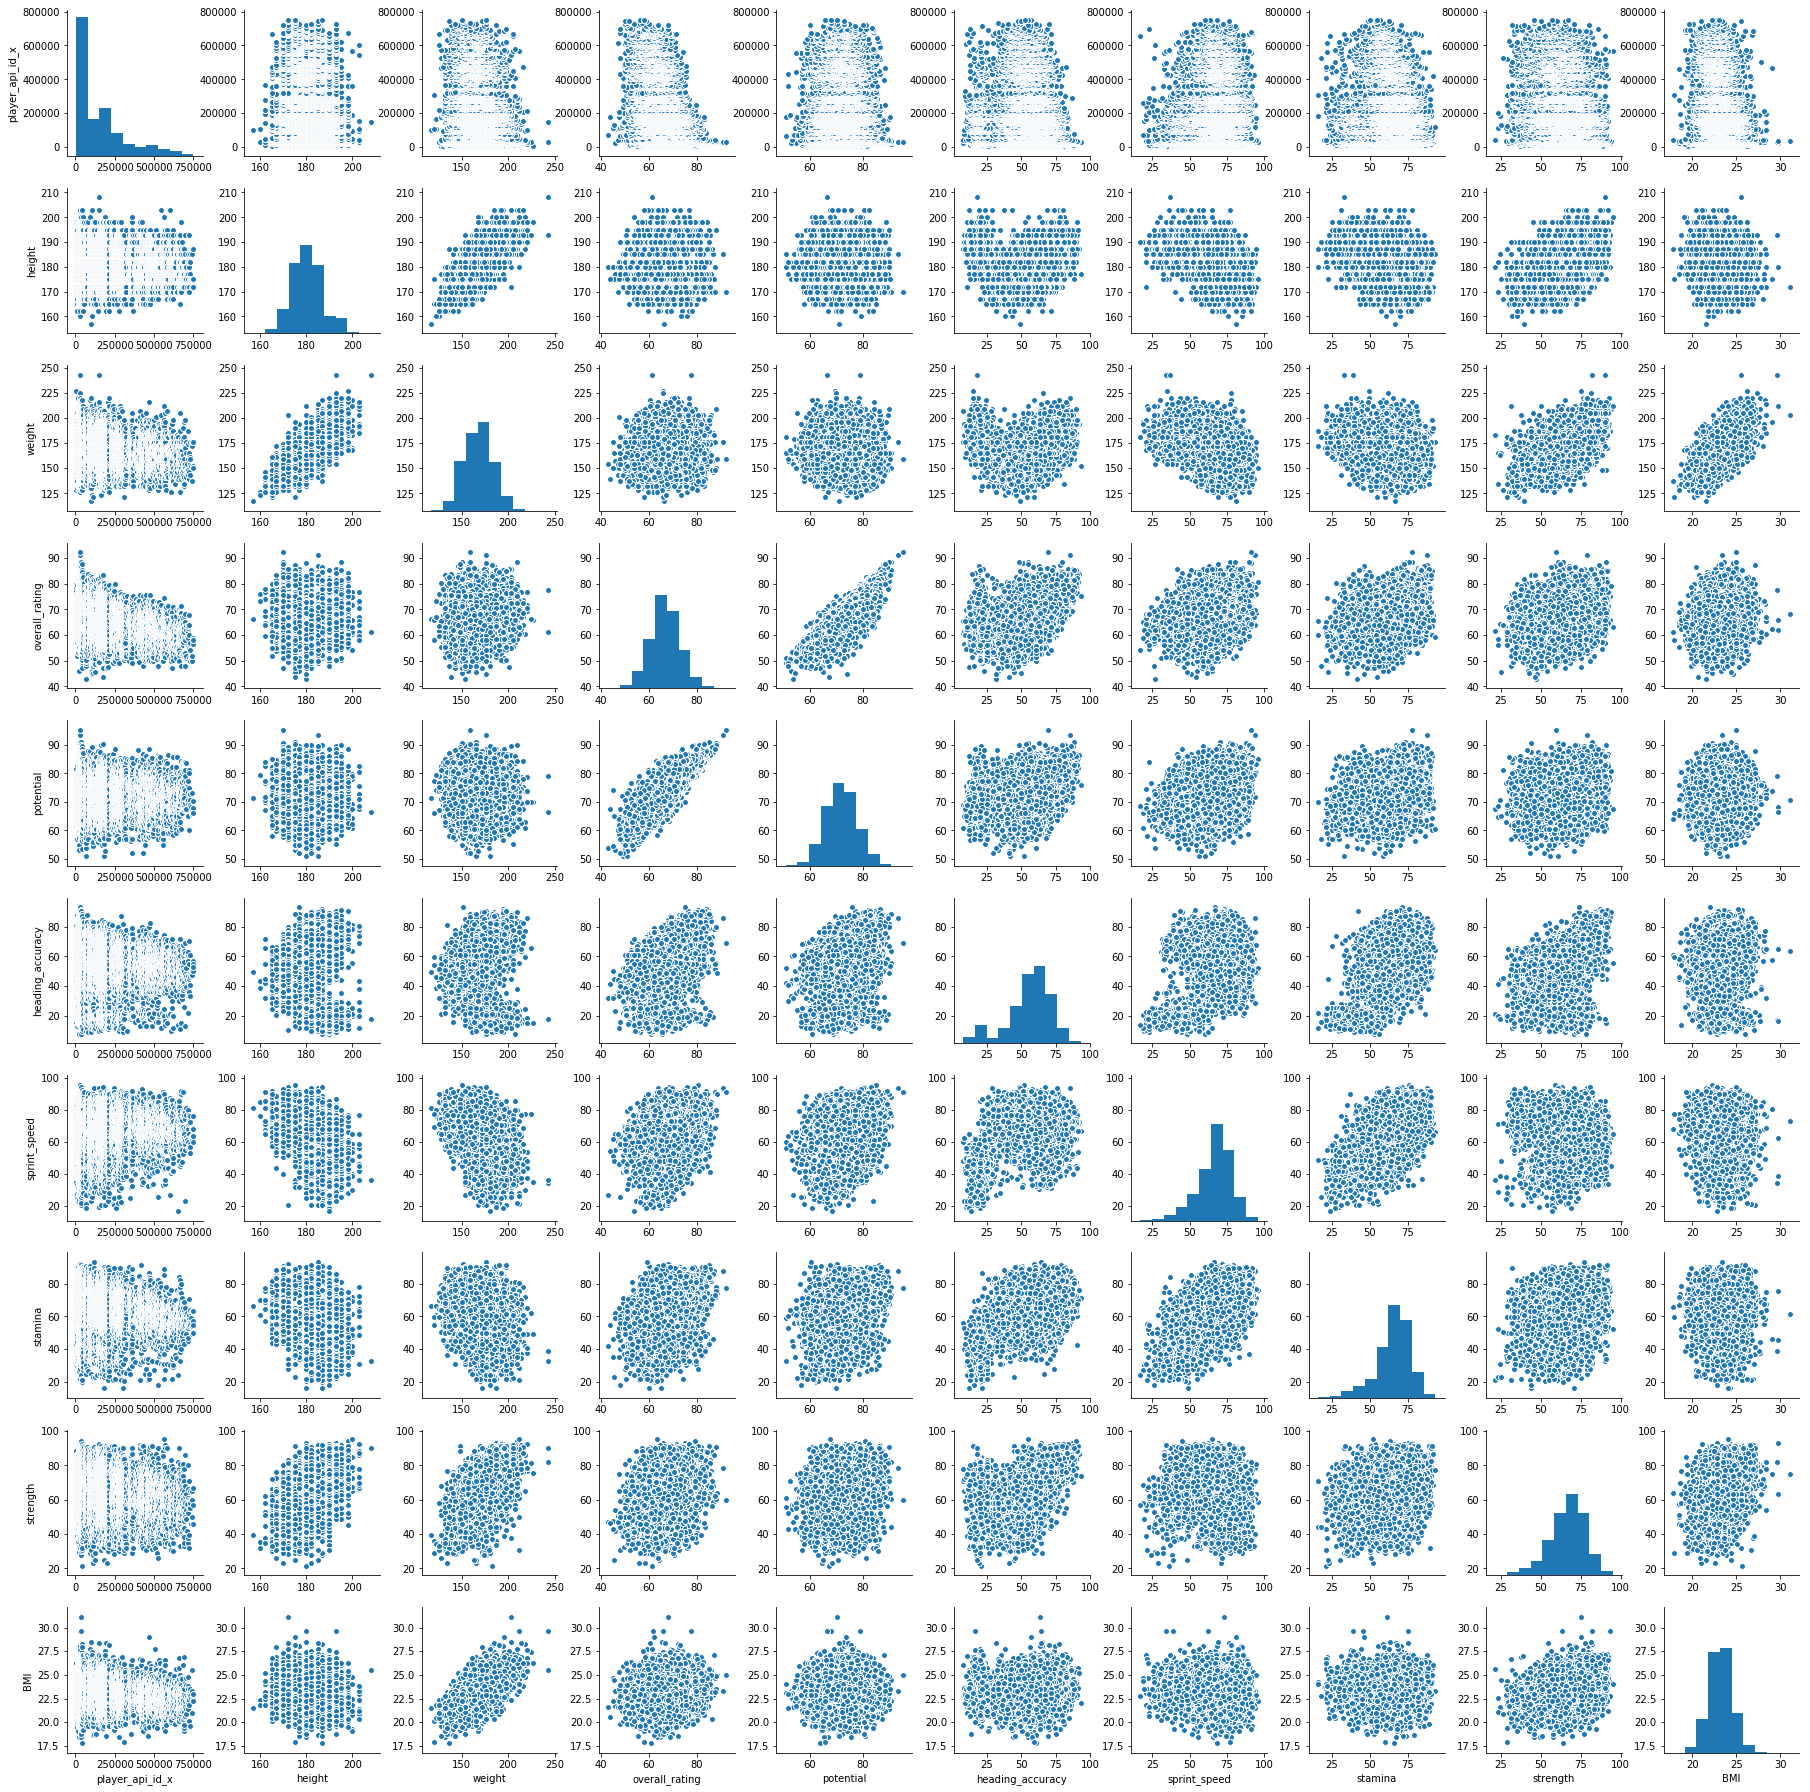

In [57]:
#To plot both scattered diagrams and histograms
sns.pairplot(PPA_mean)
plt.show()

In [58]:
Height_diff= PPA_mean.groupby(['height_levels'], as_index=False)['height', 'overall_rating', 'potential',
                                         'heading_accuracy', 'sprint_speed', 'stamina', 'strength'].mean()

In [59]:
Height_diff

,height_levels,height,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
0,Short,164.391892,67.365543,73.327754,47.099300,76.616814,66.019499,46.123980
1,Medium,172.968289,67.049187,72.645677,52.310787,72.994409,68.031017,57.924420
2,Tall,183.554933,66.758261,71.937541,57.146326,65.105601,64.783815,69.046434


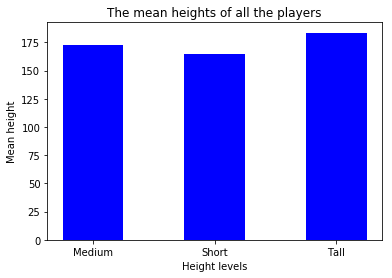

In [60]:
plt.bar(Height_diff.height_levels, Height_diff.height, color='blue', width =0.5)
plt.ylabel('Mean height')
plt.xlabel('Height levels')
plt. title('The mean heights of all the players')
plt.show()

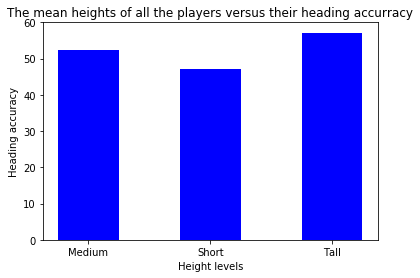

In [61]:
plt.bar(Height_diff.height_levels, Height_diff.heading_accuracy, color='blue', width =0.5)
plt.ylabel('Heading accuracy')
plt.xlabel('Height levels')
plt. title('The mean heights of all the players versus their heading accurracy')
plt.show()

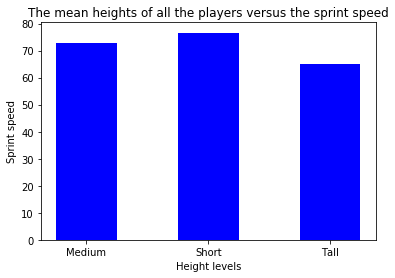

In [62]:
plt.bar(Height_diff.height_levels, Height_diff.sprint_speed, color='blue', width =0.5)
plt.ylabel('Sprint speed')
plt.xlabel('Height levels')
plt. title('The mean heights of all the players versus the sprint speed')
plt.show()

In [63]:
Height_diff.set_index('height_levels')

,height,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength
height_levels,,,,,,,
Short,164.391892,67.365543,73.327754,47.099300,76.616814,66.019499,46.123980
Medium,172.968289,67.049187,72.645677,52.310787,72.994409,68.031017,57.924420
Tall,183.554933,66.758261,71.937541,57.146326,65.105601,64.783815,69.046434


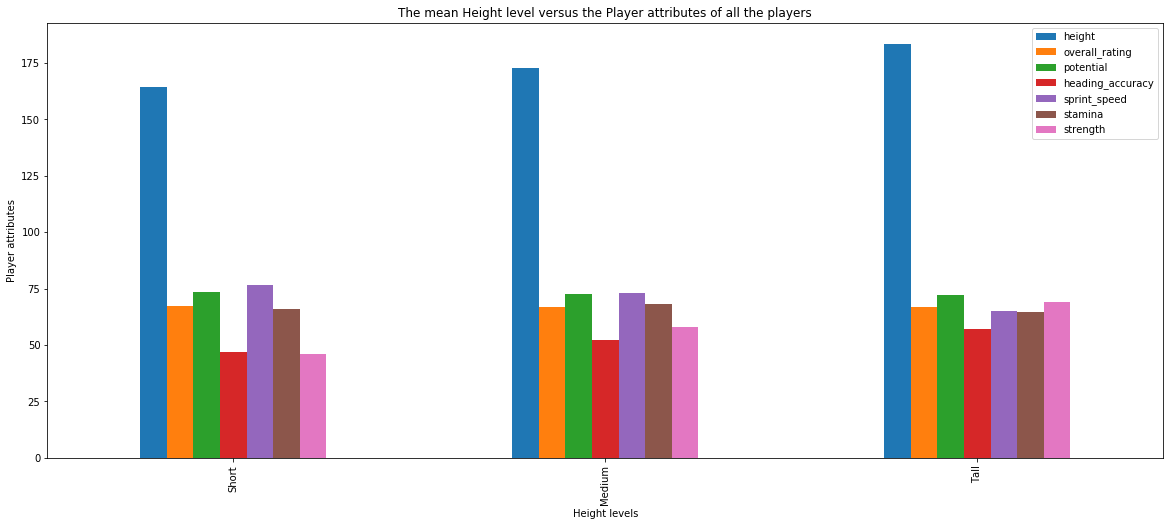

In [64]:
Height_diff.set_index('height_levels').plot(kind='bar', figsize=(20,8))
plt.ylabel('Player attributes')
plt.xlabel('Height levels')
plt. title('The mean Height level versus the Player attributes of all the players')
plt.show()

In [65]:
Height_diff.columns

Index(['height_levels', 'height', 'overall_rating', 'potential',
       'heading_accuracy', 'sprint_speed', 'stamina', 'strength'],
      dtype='object')

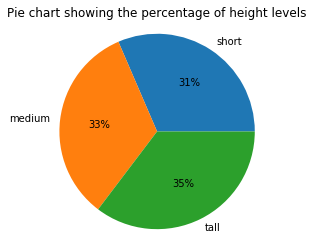

In [66]:
data =[164, 173, 184]
labels =['short','medium', 'tall']
colors =sns.color_palette('pastel')
plt.pie(data, labels=labels, autopct='%.0f%%'),
plt.title('Pie chart showing the percentage of height levels')
plt.axis('square')
plt.show()

**Research Question 2**: What is the relationship between weight and some players' attributes such as overall rating, potential, heading accuracy and sprint speed?

In [67]:
#Recall the dataframe to be used
PPA_mean.head()

,player_api_id_x,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,height_levels,BMI,BMI_levels
0,2625,175,154,60.142857,61.142857,46.285714,63.285714,77.285714,55.785714,Medium,22.809097,Normal
1,2752,187,174,69.380952,70.380952,75.333333,42.190476,60.904762,82.238095,Tall,22.569893,Normal
2,2768,180,154,69.285714,70.571429,66.666667,58.904762,59.285714,67.428571,Tall,21.559525,Normal
3,2770,180,161,71.133333,73.533333,67.800000,59.800000,51.000000,62.600000,Tall,22.539503,Normal
4,2790,175,163,70.200000,75.800000,55.200000,71.200000,70.400000,71.000000,Medium,24.142096,Normal


In [68]:
#To group the BMI into 4 categories
BMI_levels= PPA_mean.groupby(['BMI_levels'], as_index=False)['height', 'weight','overall_rating', 'potential',
                                         'heading_accuracy', 'sprint_speed', 'stamina', 'strength', 'BMI'].mean()

In [69]:
BMI_levels

,BMI_levels,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,BMI
0,Underweight,180.400000,130.800000,63.233462,67.652564,55.619359,68.661795,66.510000,49.273077,18.226152
1,Normal,181.329849,166.852677,66.689267,72.035255,56.092805,66.893706,65.480977,66.158330,22.990526
2,Overweight,180.784228,185.515882,68.305189,72.726506,56.176311,65.495703,65.097893,72.094229,25.720674
3,Obesed,172.000000,203.000000,68.028571,70.514286,63.914286,72.857143,61.400000,75.085714,31.124517


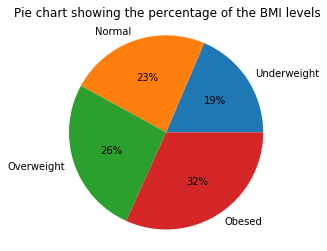

In [70]:
data =[18.23, 22.99, 25.72, 31.12]
labels =['Underweight','Normal', 'Overweight', 'Obesed']
colors =sns.color_palette('pastel')
plt.pie(data, labels=labels, autopct='%.0f%%'),
plt.title('Pie chart showing the percentage of the BMI levels')
plt.axis('square')
plt.show()

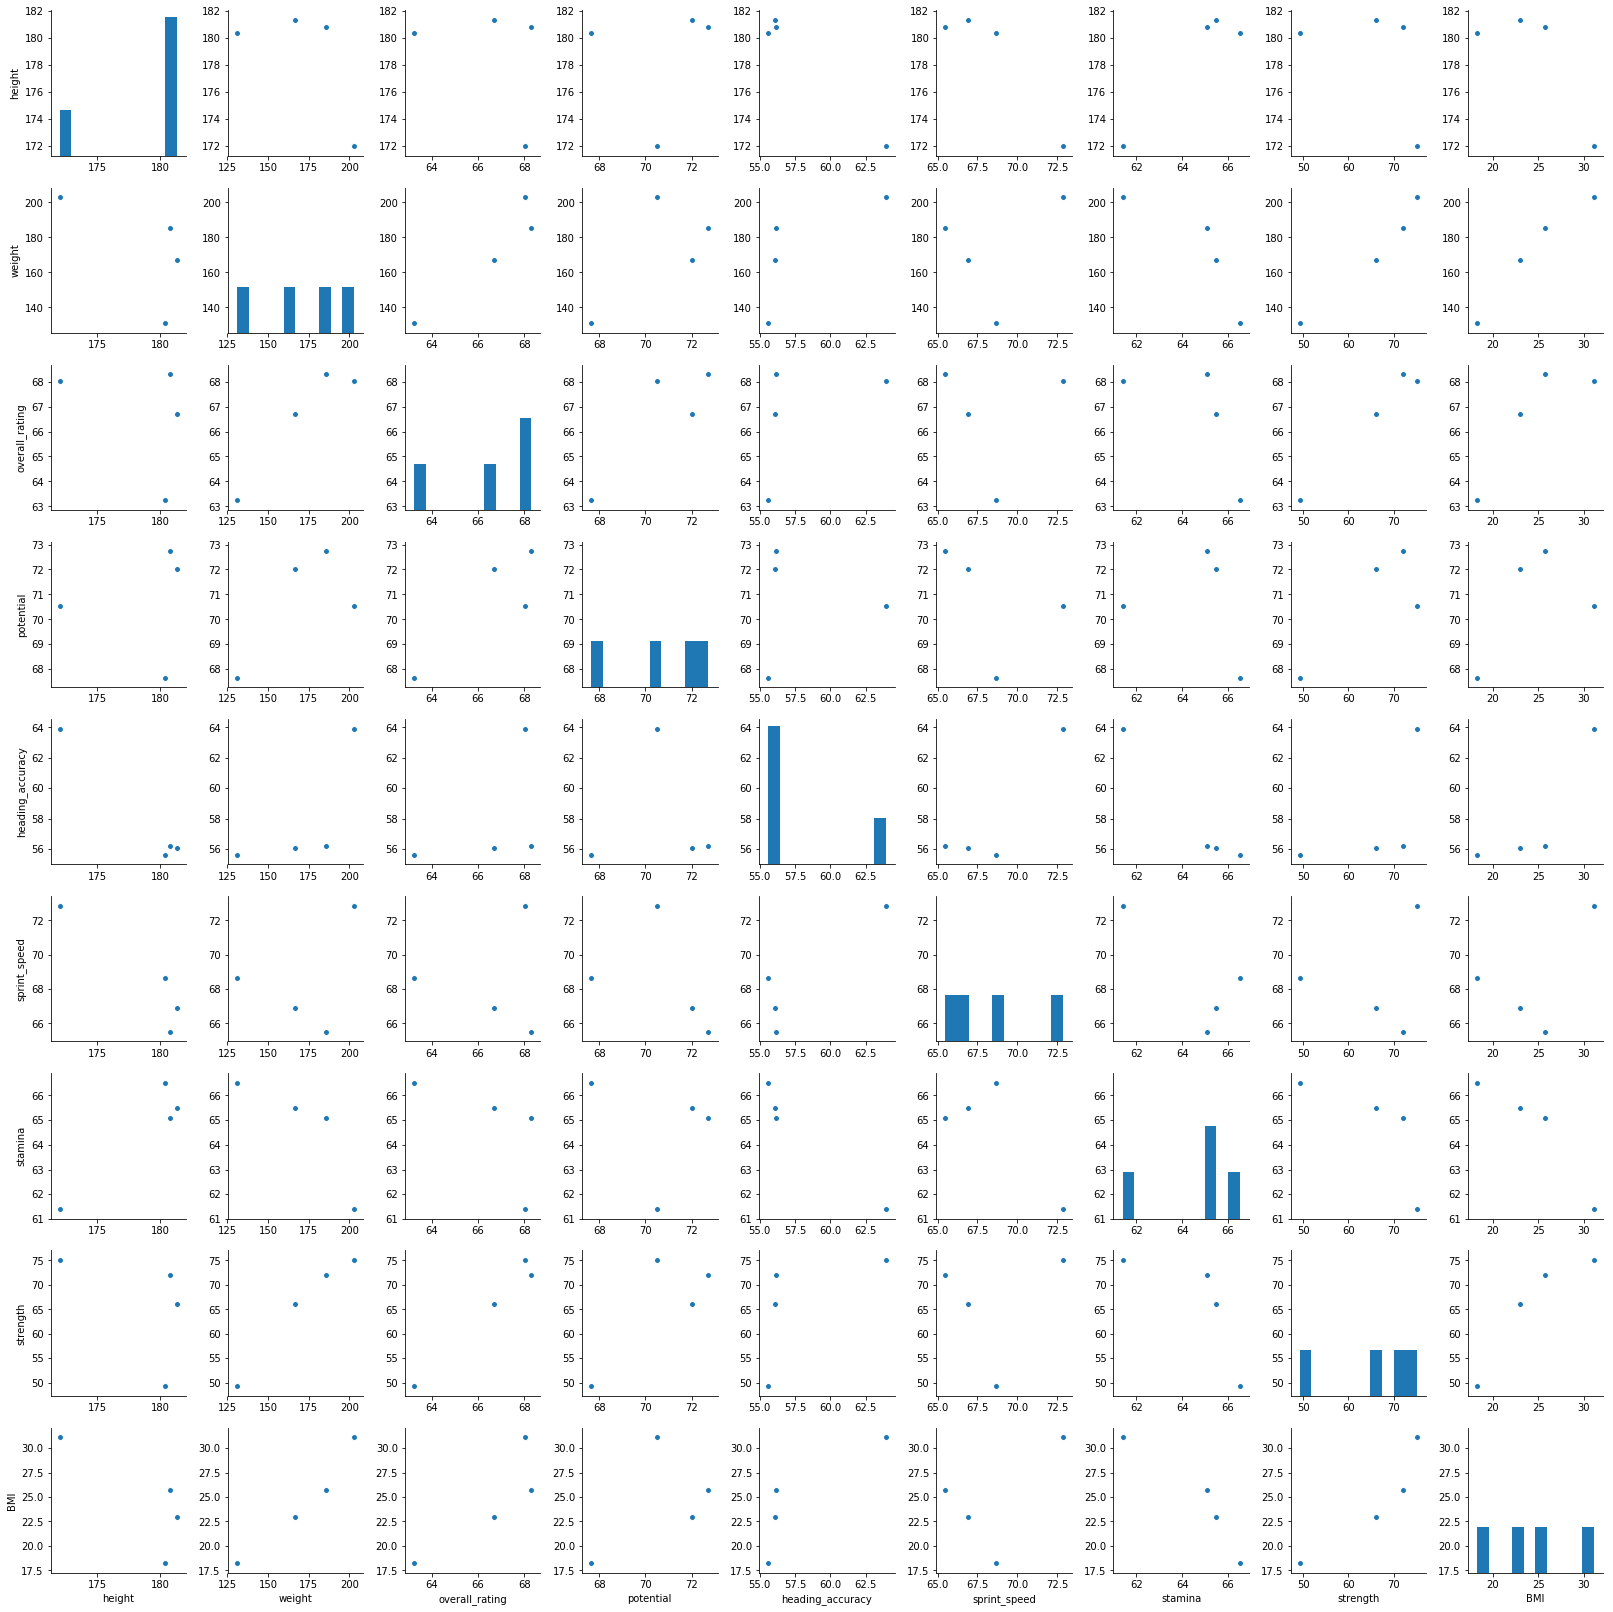

In [71]:
#This can be an exploratory relationship among variables 

sns.pairplot(BMI_levels)

**To view the bar plots distinctively for clarity purpose, and to have an idea of what is going on in the clustered barchart**

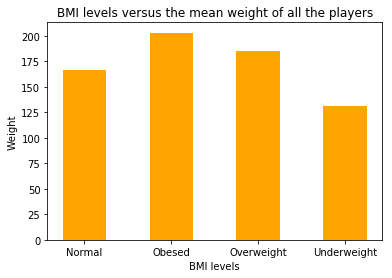

In [72]:
#Barchart of weight versus BMI levels
plt.bar(BMI_levels.BMI_levels, BMI_levels.weight, color='orange', width =0.5)
plt.ylabel('Weight')
plt.xlabel('BMI levels')
plt. title('BMI levels versus the mean weight of all the players')
plt.show()

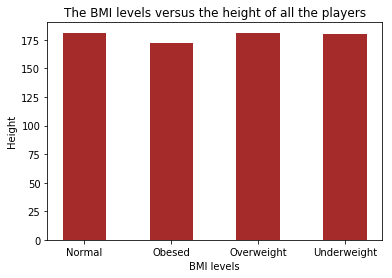

In [73]:
#Barchart of height versus BMI levels
plt.bar(BMI_levels.BMI_levels, BMI_levels.height, color='brown', width =0.5)
plt.ylabel('Height')
plt.xlabel('BMI levels')
plt. title('The BMI levels versus the height of all the players')
plt.show()

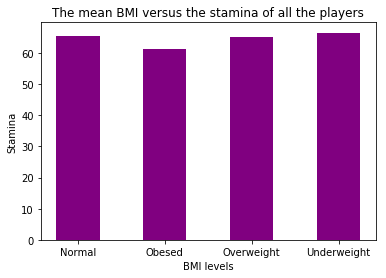

In [74]:
#Barchart of stamina versus BMI levels
plt.bar(BMI_levels.BMI_levels, BMI_levels.stamina, color='purple', width =0.5)
plt.ylabel('Stamina')
plt.xlabel('BMI levels')
plt. title('The mean BMI versus the stamina of all the players')
plt.show()

In [75]:
#To prepare the dataset for a bar chart plot 
BMI_levels.set_index('BMI_levels')

,height,weight,overall_rating,potential,heading_accuracy,sprint_speed,stamina,strength,BMI
BMI_levels,,,,,,,,,
Underweight,180.400000,130.800000,63.233462,67.652564,55.619359,68.661795,66.510000,49.273077,18.226152
Normal,181.329849,166.852677,66.689267,72.035255,56.092805,66.893706,65.480977,66.158330,22.990526
Overweight,180.784228,185.515882,68.305189,72.726506,56.176311,65.495703,65.097893,72.094229,25.720674
Obesed,172.000000,203.000000,68.028571,70.514286,63.914286,72.857143,61.400000,75.085714,31.124517


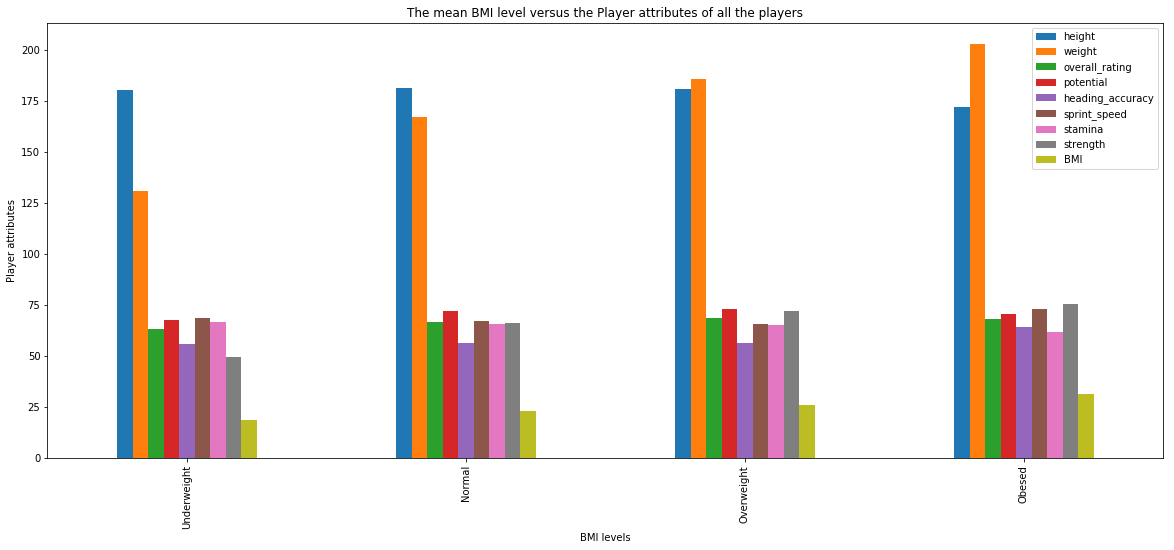

In [76]:
#Plot the barchart as a group
BMI_levels.set_index('BMI_levels').plot(kind='bar', figsize=(20,8))
plt.ylabel('Player attributes')
plt.xlabel('BMI levels')
plt. title('The mean BMI level versus the Player attributes of all the players')
plt.legend(loc='upper right')
plt.show()

## Conclusions

### Findings on Question 1

#### Result
 
From the analysis, the mean height levels: short, medium and tall players are 164.39, 172.97, and 183.55 cm, respectively.
The result revealed that tall players have higher heading accuracy and strenth but short playerrs have better sprint speed and stamina. Furthermore, results shows that short players have higher overall rating than medium and tall players. The later is further butressed by results on players'potentials. There is only a slight difference between the players of medium and tall heights in terms of their potentials. From the pie chart, the player heights are 31, 33, and 35% for short, medium and tall players, respectively. Hence, there are more tall player than short players.
    
#### Discussion
This result is also supported by the football observatory report. According to the football observatory report, there is no correlation between the average height of players in soccer teams and their performance in soccer match. Rather, the gaps observed in their overall rating and potential, as regards to players performance, may possibly be attributed to the diverse players' trainings, practice, and approaches engaged in the socceer game. Although, tall players may be preferred for the position of goal keepers or midfield players for the purpose of accurate heading of ball and catching the ball, the shorter players have better sprint speed and stamina that give them a better advantage. In summary, short players may complement the tall ones, however, it is necessary that both the tall and short players train to become more professional, as such these players representing their respective team will be well distinguished in excellence.



### Findings on Question 2

#### Result
From the pie chart, the percentage of players categorized based on their BMI levels as underweight, normal, overweight, and obesed are 19, 23, 26, 32%, respectively. 

The weight of player as it affect the players attibutes or perfomance in a given football match may not give substantial information. For this reason, the body mass index (BMI) was used. Accorging to the Centers for Disease Control and Prevention (CDC), BMI is defined as a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet).

 
The present analysis observed that players who are obesed have higher overall rating, possibly due to higher sprint speed, strength, heading accuracy. However, those with normal BMI, showed better potential based on their heights.
 
#### Discussion
According to CDC, high BMI indicates high body fatness but it does not diagnose the body fatness or health of an individual. Also, it must be noted that the heights of players affect BMI while other factors, especially bone index, contribute to the weight of a player. The result  of this analysis reveals that obesed players have high heading accuracy and strength. The later qualities determine the position of players as an offensive or defensive player in a given soccer match as well as the player's effeciency in such position.  The observation from is this analysis is supported by the report of Dengel et al. (2020) on the body composition and bone mineral density of national football league players. According to Dengel et al. (2020), there is a relationship between the bone density of players and their body fat. Hence, the obesed player have features that are required, however, the weight (as reflected in BMI) may not provide a robust means of assessing a player's attribute wholesomely, even though players are **not expected to be fat. 

The age of players is necessary in deciding whether a player is obesed or not. Besides the age of the players, players are also encourage to take calcium and magnesium supplement for strong bones, considering their straneous physical activity. These calcium and magnesium deposit in the bone and may increase the bone index, and consequently, the weight of players. According to Dobrowolski et al. (2020), calcium intake is one of the determining factors in bone mass formation and has an effect on bone index/density. In the later case, the combination of calcium rich-meal or supplement and the short heights of players may produce high BMI such that a player may be tagged 'obesed'.

Finally, the calorie intake, in addition to the supplement, must be taken into cognisance as soccer players require lots of energy which are majorly carbohydates for their high physical actitivities.



### Possible additional research
1. Considering the age changes across the various years of data collection, how does the age of a player affect the height of playesr?

2. Considering the high physical activities of soccer players, what type of dieting have any impact on the height of soccer players? 


    
### Limitations
1. The age of the individual player gives a clearer definition of obesity. Note that BMI is further classified (into BMI for children and BMI for adult) depending on the age. Unfortunately, this analysis did not factor in the age of the players.

2. Medical information such as calcium and magnesium levels may be included.

3. Information on whether the player is on any calcium/magnesium supplement may be included.

4. Information on calorie/carbohydrate intake for individual player can be included.


    
## References

1. Max Roser, Cameron Appel and Hannah Ritchie (2013) - "Human Height". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/human-height' [Online Resource]

2. https://www.bartleby.com/questions-and-answers/we-classify-the-height-into-three-categories-short-below-165-cm-medium-165-175-cm-and-tall-more-than/932edd0b-3459-41aa-baf1-b82b44665173

3. https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/index.html

4. https://football-observatory.com/Does-height-matter-in-football-1917

5. Dobrowolski H, Karczemna A, Włodarek D. Nutrition for Female Soccer Players-Recommendations. Medicina (Kaunas). 2020 Jan 10;56(1):28. doi: 10.3390/medicina56010028. PMID: 32284520; PMCID: PMC7022222.

6. https://healthfully.com/bone-density-and-body-fat-percentage-8080920.html

7. Dengel DR, Bosch TA, Burruss TP, Fielding KA, Engel BE, Weir NL, Weston TD. Body composition and bone mineral density of national football league players. J Strength Cond Res. 2014 Jan;28(1):1-6. doi: 10.1519/JSC.0000000000000299. PMID: 24149760.

8. https://www.kaggle.com/datasets/hugomathien/soccer


In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0